<a href="https://colab.research.google.com/github/fangnes/pucrio_data_science_and_analytics/blob/main/MVP_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center">Pontifícia Universidade Católica do Rio de Janeiro</h1>

<h1 style="text-align:center">Machine Learning & Analytics MPV</h1>

<h3 style="text-align:center">Author: Felipe da Silva Angnes</h3>

<h3 style="text-align:center">Professors: Tatiana Escovedo, Hugo Villamizar, Marcos Kalinowski, Antonio Pedro, Simone Barbosa</h3>

# 1. Introduction

This document aims to describe the process executed during the minimum viable product (MVP) development as the final work for the Exploratory Data Analysis discipline, which is the second module of my Data Science and Analytics specialization at Pontifícia Universidade Católica do Rio de Janeiro ([PUC-RJ](https://www.puc-rio.br/index.html)).

This work presents the exploratory data analysis and dataset preparation for further machine learning modeling of a classification problem and it is structured as follows: @TODO

# 2. Problem Definition

The dataset selected for this work is available in the University of California, Irvine (UC Irvine) Machine Learning Repository through this [link](https://archive.ics.uci.edu/dataset/46/hepatitis). The dataset is licensed under the [Creative Commons Attribution 4.0 Internacional](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license and it was created by Gail Gong.

The dataset contains several informations regarding the health of patients infected with hepatitis. The goal of this dataset is to determine if the patient will either die or survive the disease according to the collected data. Therefore, we are working on a classification problem. This dataset have 19 features and mostly are boolean or numeric valued attribute types. It has 155 instances and it is stated that there are missing values in this dataset.

The structure of the hepatitis dataset is, as stated before, 19 columns and 155 instances. The table below presents the 19 attributes and it's description:

##Table 1: dataset structure <a id="table-1"></a>
|Attribute      |Role   |Type       |Missing Values|Values                             |
|---------------|-------|-----------|--------------|-----------------------------------|
|Class          |Target |Categorical|no            |die, live                          |
|Age            |Feature|Integer    |no            |10, 20, 30, 40, 50, 60, 70, 80     |
|Sex            |Feature|Categorical|no            |male, female                       |
|Steroid        |Feature|Categorical|yes           |no, yes                            |
|Antivirals     |Feature|Categorical|no            |no, yes                            |
|Fatigue        |Feature|Categorical|yes           |no, yes                            |
|Malaise        |Feature|Categorical|yes           |no, yes                            |
|Anorexia       |Feature|Categorical|yes           |no, yes                            |
|Liver Big      |Feature|Categorical|yes           |no, yes                            |
|Liver Firm     |Feature|Categorical|yes           |no, yes                            |
|Spleen Palpable|Feature|Categorical|yes           |no, yes                            |
|Spiders        |Feature|Categorical|yes           |no, yes                            |
|Ascites        |Feature|Categorical|yes           |no, yes                            |
|Varices        |Feature|Categorical|yes           |no, yes                            |
|Bilirubin      |Feature|Continuous |yes           |0.39, 0.80, 1.20, 2.00, 3.00, 4.00 |
|Alk Phosphate  |Feature|Integer    |yes           |33, 80, 120, 160, 200, 250         |
|Sgot           |Feature|Integer    |yes           |13, 100, 200, 300, 400, 500        |
|Albumin        |Feature|Integer    |yes           |2.1, 3.0, 3.8, 4.5, 5.0, 6.0       |
|Protime        |Feature|Integer    |yes           |10, 20, 30, 40, 50, 60, 70, 80, 90 |
|Histology      |Feature|Integer    |no            |no, yes                            |

# 3. Notebook Configuration

In this section we present the notebook setup and dataset loading.

## 3.1 Installing packages

To install the packages needed for this work, we will use the Preferred Installer Program (aka PIP Installs Package), which is a command-line utility that installs, reinstalls or uninstalls PyPI (Python Package Index) packages through the command `pip`.

In order to load the dataset from the UC Irvine Machine Learning Repository, it is required to install the ucimlrepo package.

In [41]:
pip install ucimlrepo

## 3.2 Importing libraries

Here we import all necessary libraries and packages. The corresponding utitlity for this work is in the comments at the same line.

In [42]:
import pandas as pd                                     # To load and manipulate the dataset
import matplotlib.pyplot as plt                         # To data visualization
import seaborn as sns                                   # To heatmap
import missingno as ms                                  # To handle missing values
import numpy as np

from scipy.stats import pointbiserialr                  # To point-biserial correlation
from ucimlrepo import fetch_ucirepo                     # To fetch the dataset
from scipy.stats import pointbiserialr                  # To point-biserial correlation
from scipy.stats import chi2_contingency                # To Cramér's V correlation
from sklearn.model_selection import train_test_split    # To split the dataset into train and test sets

## 3.3 Utils

In this section we define global variables and functions, to avoid code duplicity and improve readability.

### 3.3.1 Global Variables

According to Table 1, lets define a list for each column type of our dataset.

In [43]:
seed                = 26            # Random seed to ensure reproducibility
test_size           = 0.20          # We will leave 20% of the dataset for testing
target_column       = ['Class']
continuous_columns  = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']
categorical_columns = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']

### 3.3.2 Functions

#### 3.3.2.1 Cramer's V correlation

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y).to_numpy()

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)

    # Compute the Cramer's V statistic
    n = np.sum(confusion_matrix)
    min_dim = min(confusion_matrix.shape) - 1
    v = np.sqrt((chi2 / n) / min_dim)

    return v

## 3.4 Dataset Loading

In this section we load the dataset and get its features and target values as a single dataframe.

In [45]:
# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

# Concatenate X and y into one pandas dataframe
df_hepatitis = pd.concat([X,y], axis=1)

# 4 Exploratory Data Analysis

In this section we will explore the dataset to gather information regarding its size, features, missing values and the target class balance, as well as to handle any issues we find in these topcis.

## 4.1 Dataset size and features

As stated in the dataset documentation, the loaded dataset indeed have 155 instances, 19 features and 1 target class. So the dataset loading was executed successfully.

In [46]:
df_hepatitis.shape

(155, 20)

Here we used the code bellow to show the data type of each dataset feature. It is possible to notice that even though the dataset documentation states that there are 14 categorial features (where the possible values are "no" or "yes") and only 5 continuous or integer features, all data types are either `int64` or `float64`. This indicates that a lable encoding may be already performed in this dataset.

In [47]:
df_hepatitis.dtypes

,0
Age,int64
Sex,int64
Steroid,float64
Antivirals,int64
Fatigue,float64
Malaise,float64
Anorexia,float64
Liver Big,float64
Liver Firm,float64
Spleen Palpable,float64


So let's check the firsts and the lasts 5 data set instances to see how the data are disposed.

In [48]:
df_hepatitis.head(5)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


In [49]:
df_hepatitis.tail(5)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,2
154,43,1,2.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2,1


By analyzing the firsts and lasts dataset instances, we could notice that our guess was right, a lable encoding were performed in all dataset features. Unfortunately, there is no statement in the dataset documentation for the meaning of 1 and 2. To enable the subsequent analyses, we will henceforth consider the order of possible values presented in Table 1, assuming that `1` represents "no" and "die", and `2` represents "yes" and "live".

## 4.2 Missing values

Now we will analyze the missing values. The cell's result below show us the aboslute frequency of null values in each feature in descending order, so we can easily identify the features with more null values.



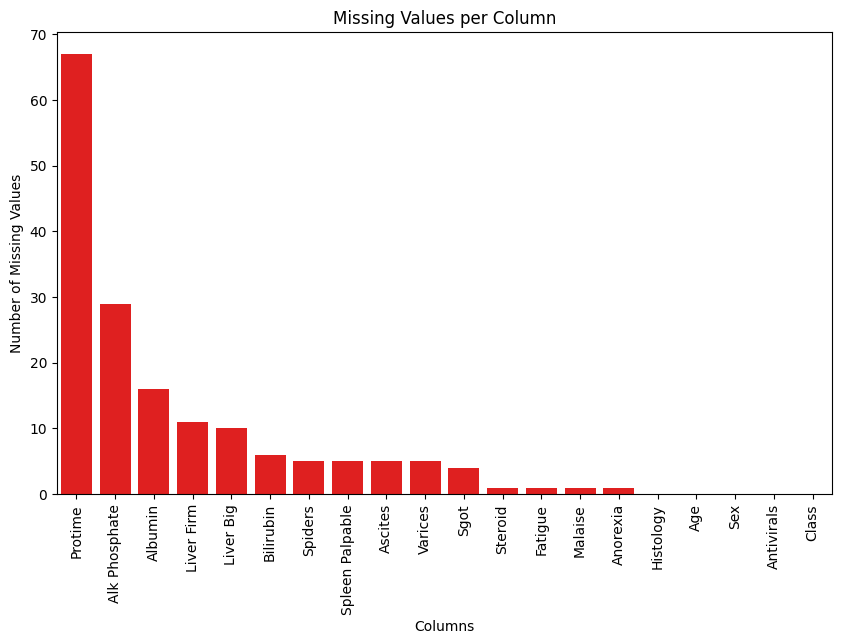

In [50]:
# Getting aboslut frequency of missing values
missing_values = df_hepatitis.isnull().sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='red')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

Now let's take a look in the relative frequency of the null values in descending order, so we can have a better idea of how big is the lack of data. By doing so, we can see that "Protime" have a huge lack of data, more than two times the lack of "Alk Phosphate" data.

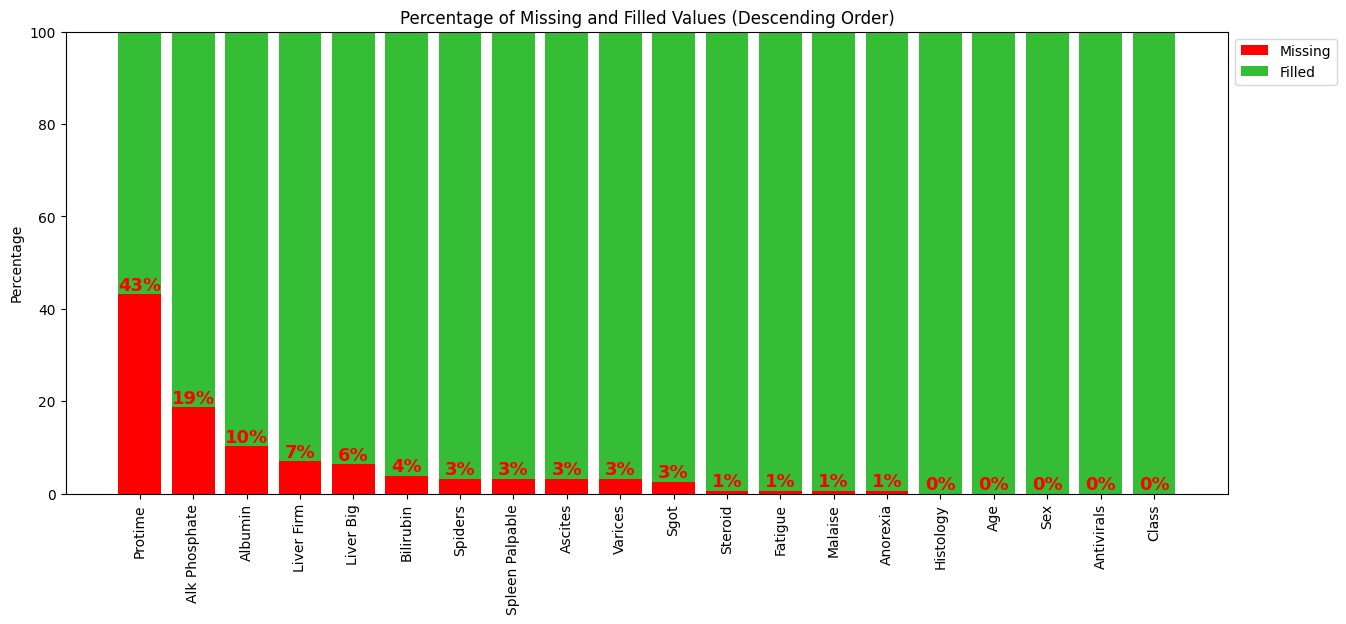

In [51]:
# Calculating the relative frequency of non null values
non_null_rel_freq = df_hepatitis.count() / df_hepatitis.shape[0]

# By getting the non_null_rel_freq complement we get the
# relative frequency of null values
null_rel_freq = 1 - non_null_rel_freq

# Calculating in percentage notation with 2 decimal digits
missing_percentage = (null_rel_freq * 100).round(2).sort_values(ascending=False)
filled_percentage = (non_null_rel_freq * 100).round(2)
filled_percentage = filled_percentage[missing_percentage.index]

# Create bar chart
fig, ax = plt.subplots(figsize=(15, 6))


ax.bar(missing_percentage.index, missing_percentage, color='red', label='Missing')
ax.bar(filled_percentage.index, filled_percentage, bottom=missing_percentage, color='#35BD35', label='Filled')

# Add labels to red bars
for i, v in enumerate(missing_percentage):
    ax.text(i, v, f'{v:.0f}%', color='red', ha='center', va='bottom', fontweight='bold', fontsize=13)

# Customize chart
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Missing and Filled Values (Descending Order)')
ax.set_xticks(np.arange(len(missing_percentage)))
ax.set_xticklabels(missing_percentage.index, rotation=90)
ax.set_ylim(0, 100)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In order to have a overall awareness regarding null values in our dataset, we will analyse que nullity matrix of our dataset, which is displayed bellow. This visualization is great to visually understand patterns in our data completion.

Text(0.5, 1.0, 'Nullity Matrix')

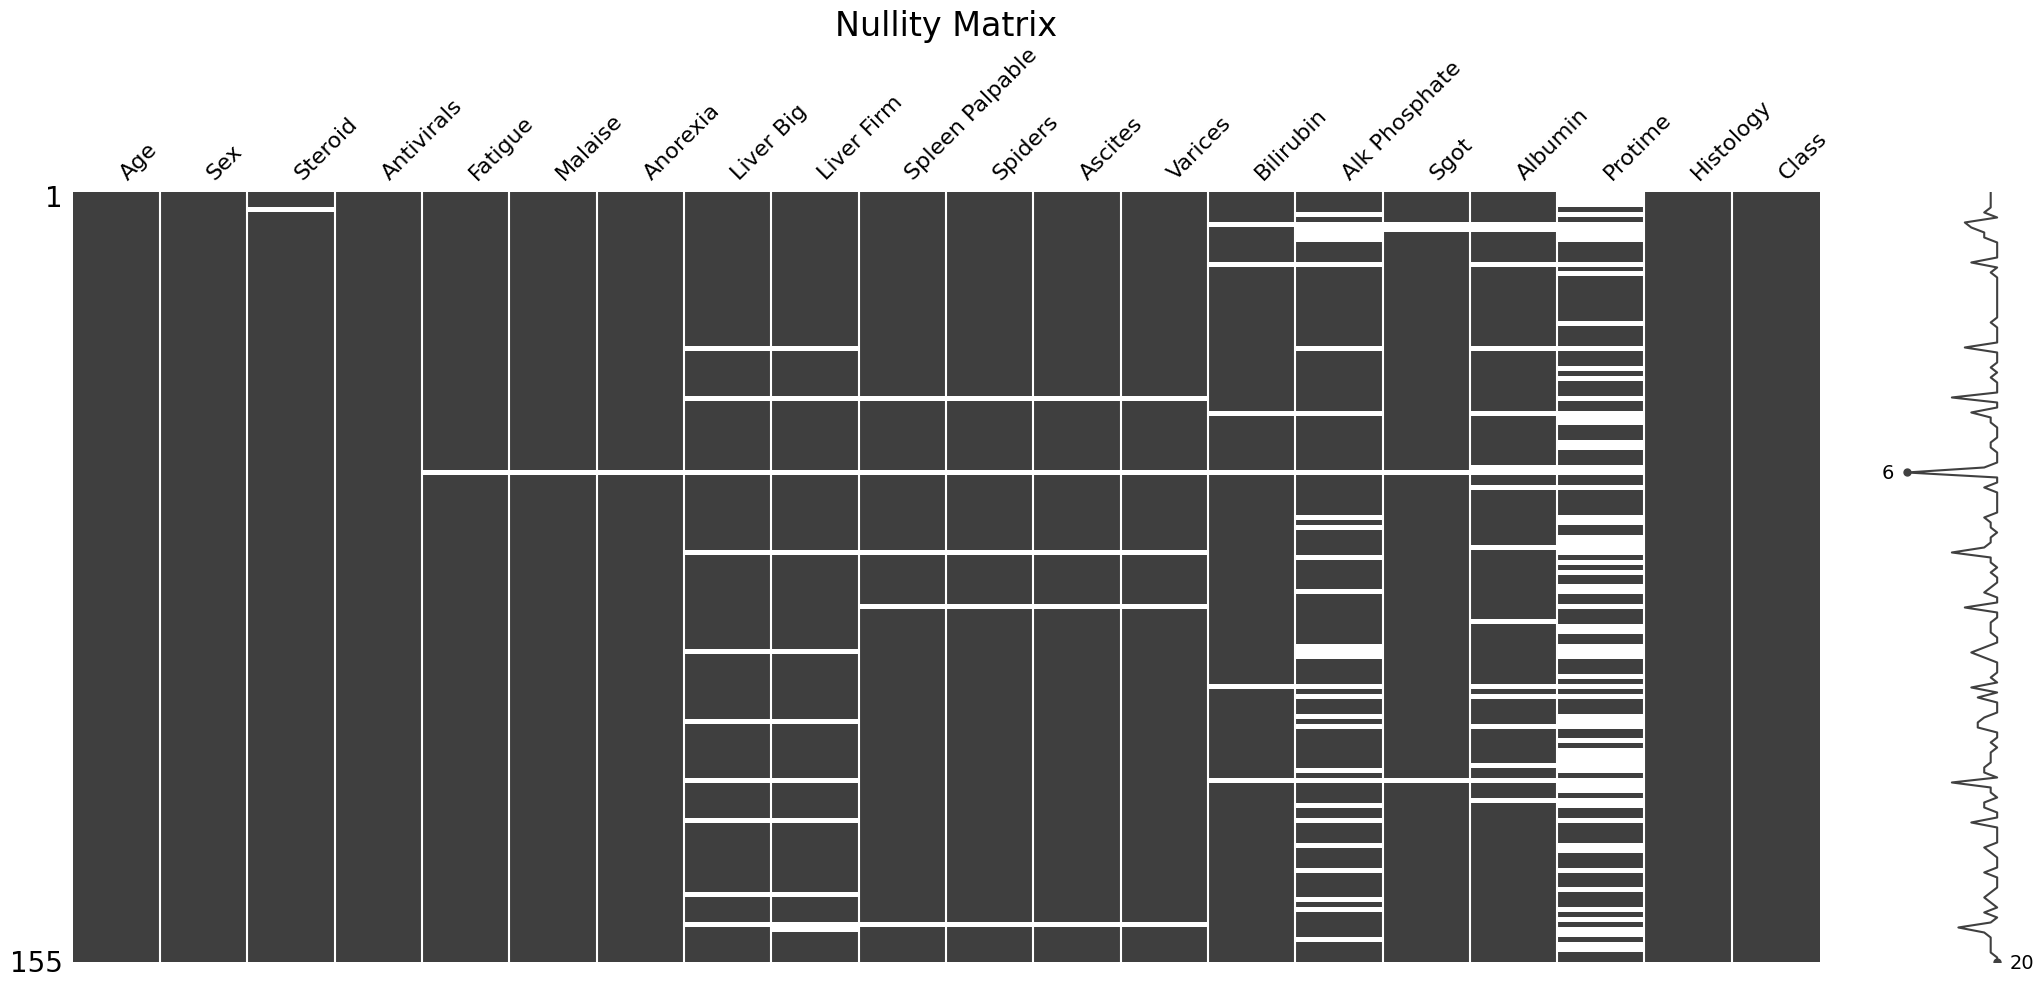

In [52]:
ax = ms.matrix(df_hepatitis)
ax.set_title('Nullity Matrix', fontsize=24)

By analyzing the nullity matrix we can see that we have one instance in our dataset with only 6 features' value filled and 13 features' values missing! Also, we can see other instances that have multiple features values missing. We'll work on this later.

## 4.3 Balance analysis

In this section we'll analyze if our dataset is either balanced or not, and if dont we'll take a look on how unbalanced it is. So lets first use the method `value_counts()` in order to print how many instances we have for each class.


In [53]:
initial_dataset_balance = df_hepatitis['Class'].value_counts()
initial_dataset_balance

,count
Class,
2,123
1,32


By analyzing the numbers that we got, we can see that our dataset has a moderate imbalance in a 1:3.8 ratio. To visualize this difference, let's use a bar chart.

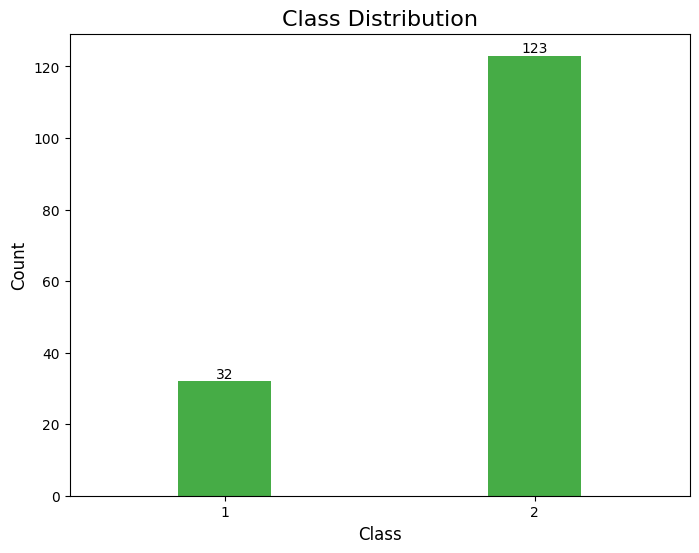

In [54]:
# Defining figure size
plt.figure(figsize=(8, 6))

# Configuring countplot
ax = sns.countplot(x='Class', data=df_hepatitis, width=0.3, color='#35BD35')

# Adding numbers to the top of the bars
ax.bar_label(ax.containers[0])

# Title and lable configuration
ax.set_title('Class Distribution', fontsize=16)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

So we have 32 instances for class `1`, which means, "die" and 123 for class `2`, which means "live". By analyzing the chart we cand visualize the magnitude of the difference.

## 4.4 Data pre-processing

Now that we know our dataset has several missing values and has a moderate imbalanced, in this section we will handle this issues.

### 4.4.1 Missing values handling

By analyzing the missing values relative frequency of our dataset we noticed that "Protime" has nearly 43% of missing values. Since it is more than two times the second feature with the most missing values (Alk Phosphate with nearly 19% missing values), we will remove the "Protime" column from our dataset, because any imputation data technique for this amount of missing values could introduce some bias. We will apply the same approach to remove the instance observed in the last Nullity Matrix that has only 6 features filled with data, and 13 features values missing.

The cell code bellow remove both the "Protime" column and the instance with the most feature values missing from our dataset. Then we check the nullity matrix again to see how it looks like now.

Text(0.5, 1.0, 'Nullity Matrix')

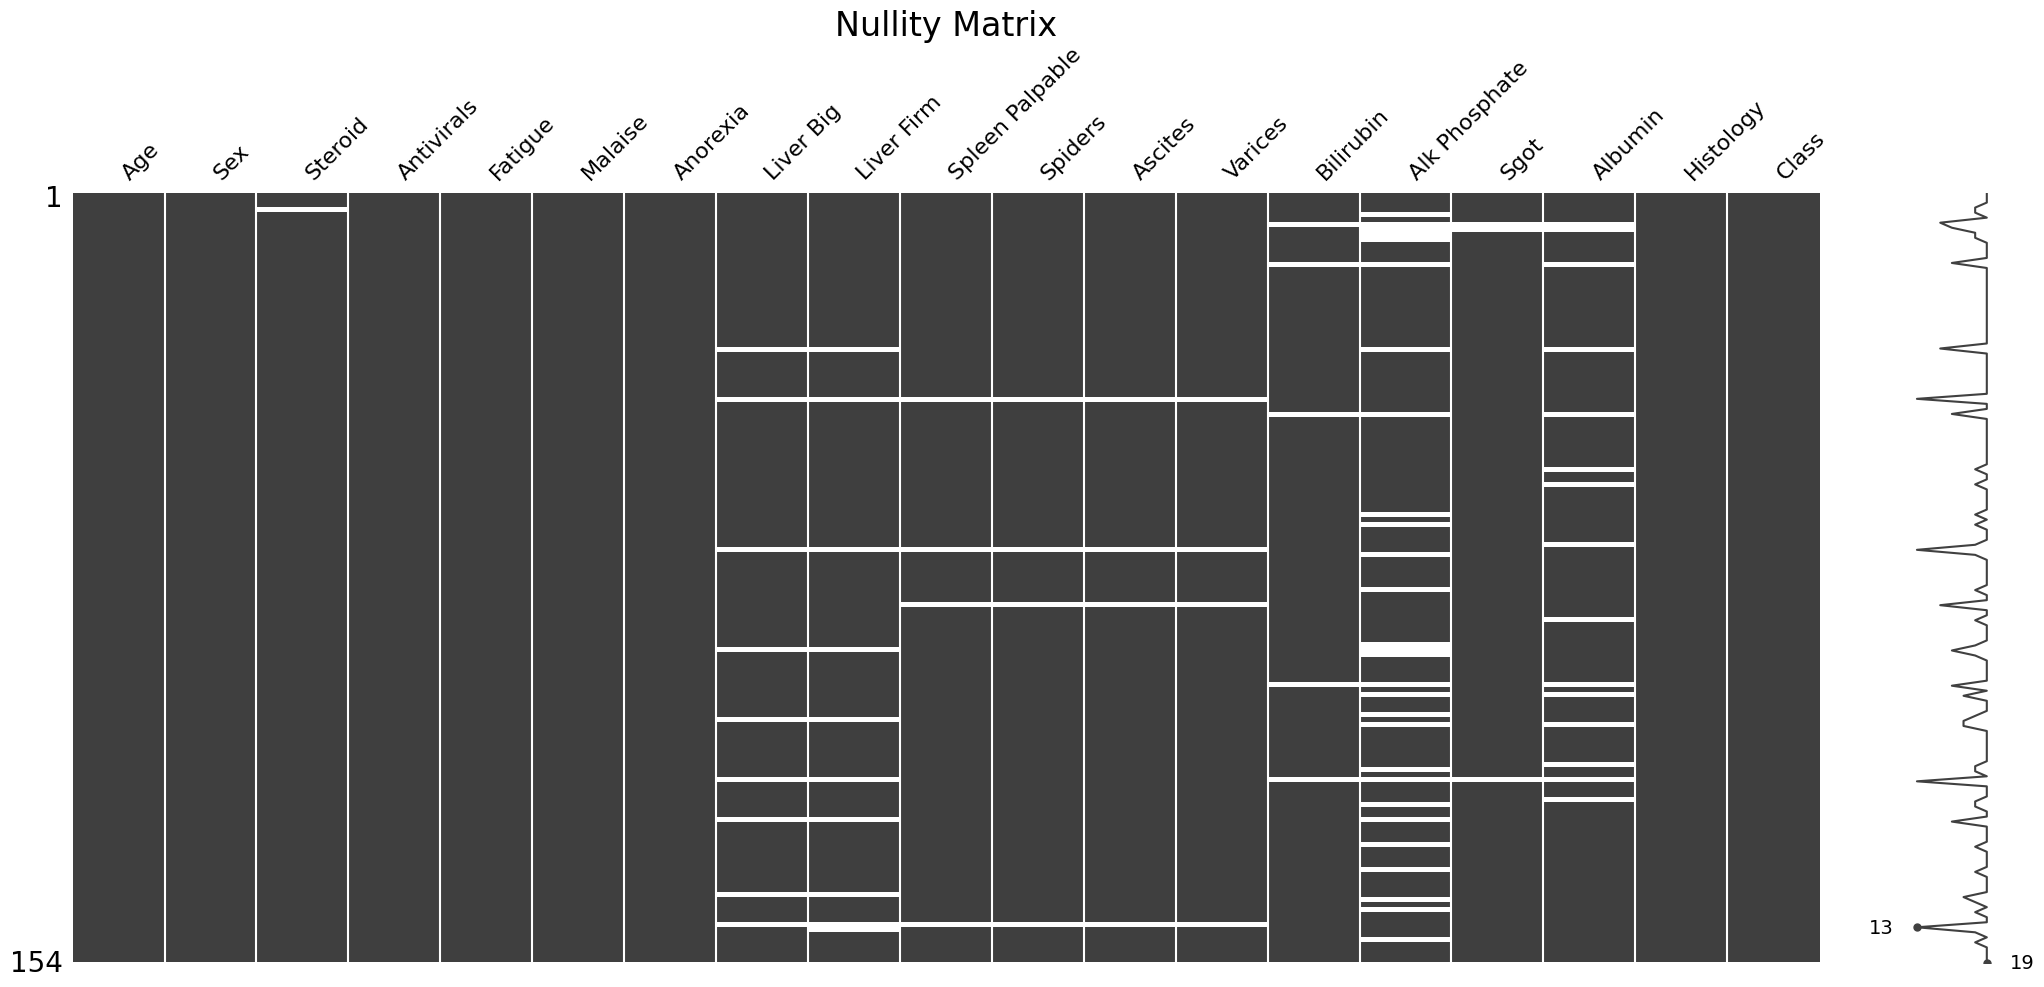

In [55]:
# Removing 'Protime' columns from our dataset
df_hepatitis.drop(['Protime'], axis=1, inplace=True)

# Removing 'Protime' from continuous columns list
continuous_columns.remove('Protime')

# Finding the row with most missing values
missing_values_rows = df_hepatitis.isnull().sum(axis=1)
row_most_missing_values = missing_values_rows.idxmax()

# Removing the row with most missing values from our dataset
df_hepatitis.drop(row_most_missing_values, inplace=True)

# Resetting the index of our dataset
df_hepatitis.reset_index(drop=True, inplace=True)

# Plotting Nullity Matrix
ax = ms.matrix(df_hepatitis)
ax.set_title('Nullity Matrix', fontsize=24)

As we can see, there are still several missing values and now our dataset have 154 instances. Also, we can see that the instance with the least number of features values filled has 13 features values filled. In order to fix the missing values lets analyze the numeric fetures distribution in our dataset.

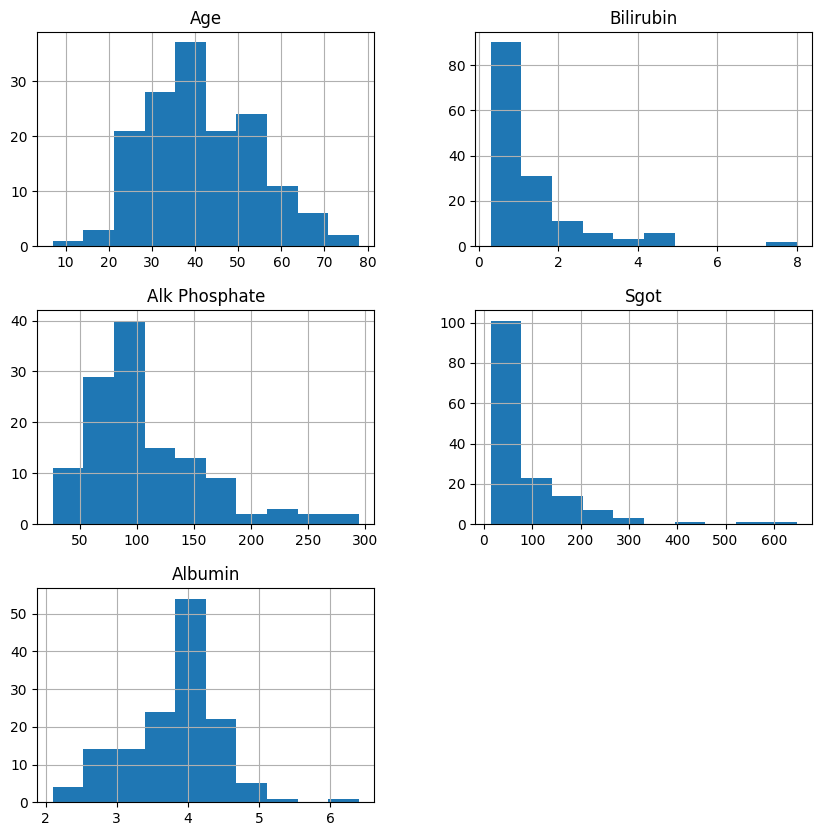

In [56]:
df_hepatitis.hist(column=continuous_columns, figsize=(10,10))
plt.show()

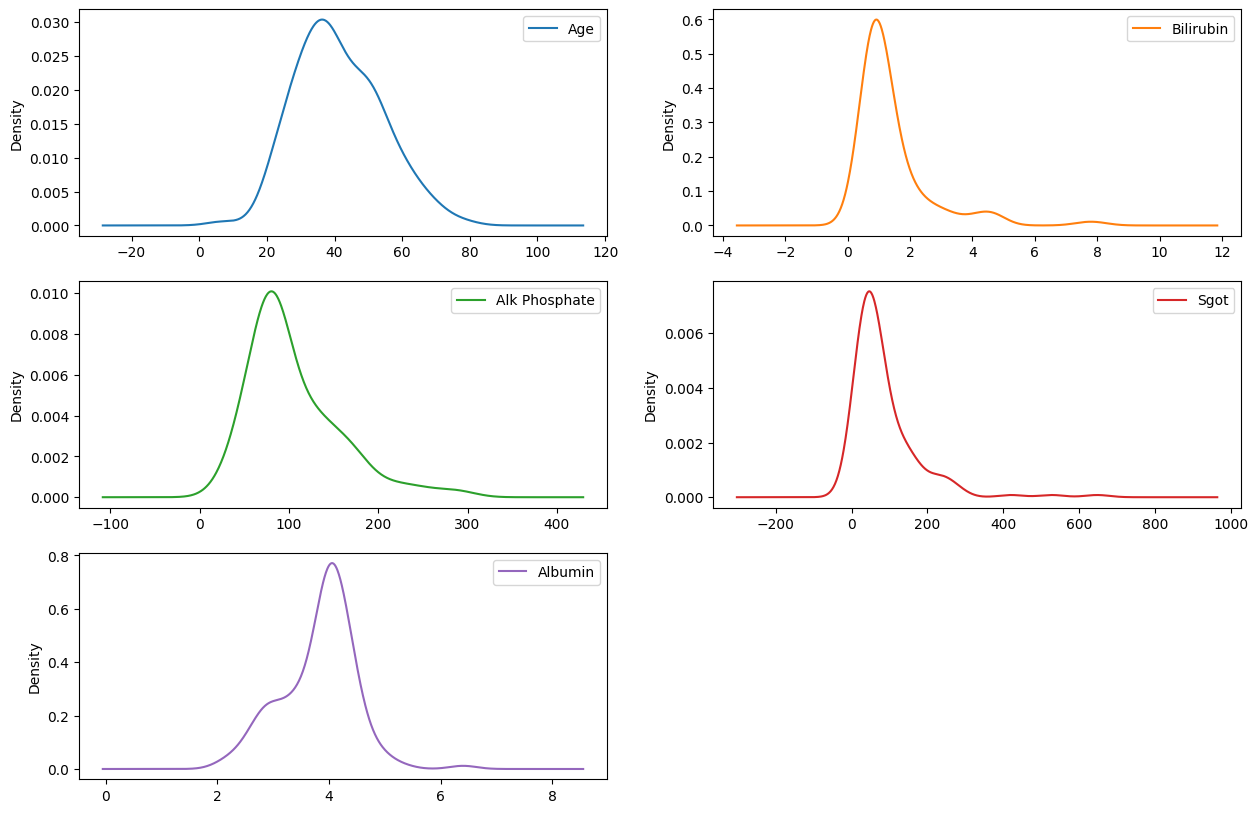

In [57]:
df_hepatitis[continuous_columns].plot(kind='density', layout=(3,2), subplots=True, sharex=False, figsize=(15,10))
plt.show()

From the histograms and density plots above, we observed the following:
- Age: has a nearly normal distribution, so mean imputation is sufficient in this case.
- Bilirubin: follows a decreasing exponential pattern, so median imputation would prevent the influence of outliers.
- Alkaline Phosphatase: has a right-skewed distribution; median imputation is also appropriate here to prevent the influence of outliers.
- Sgot: similar to Bilirubin, it follows a decreasing exponential pattern, so we will also use median imputation.
- Albumin: even though it exhibits a left-skewed distribution, opposite to Alkaline Phosphatase, we will still use median imputation to prevent the influence of outliers.

All the data imputation is codified in the cell code bellow.

In [58]:
# Filling "Age" missing values with the mean
df_hepatitis['Age'].fillna(df_hepatitis['Age'].mean(), inplace=True)

# Iterating over the remaining continuouns columns filling missing values with the median
for col in continuous_columns[1:]:
  df_hepatitis[col].fillna(df_hepatitis[col].median(), inplace=True)

Now let's take a look how our Nullity Matrix is:

Text(0.5, 1.0, 'Nullity Matrix')

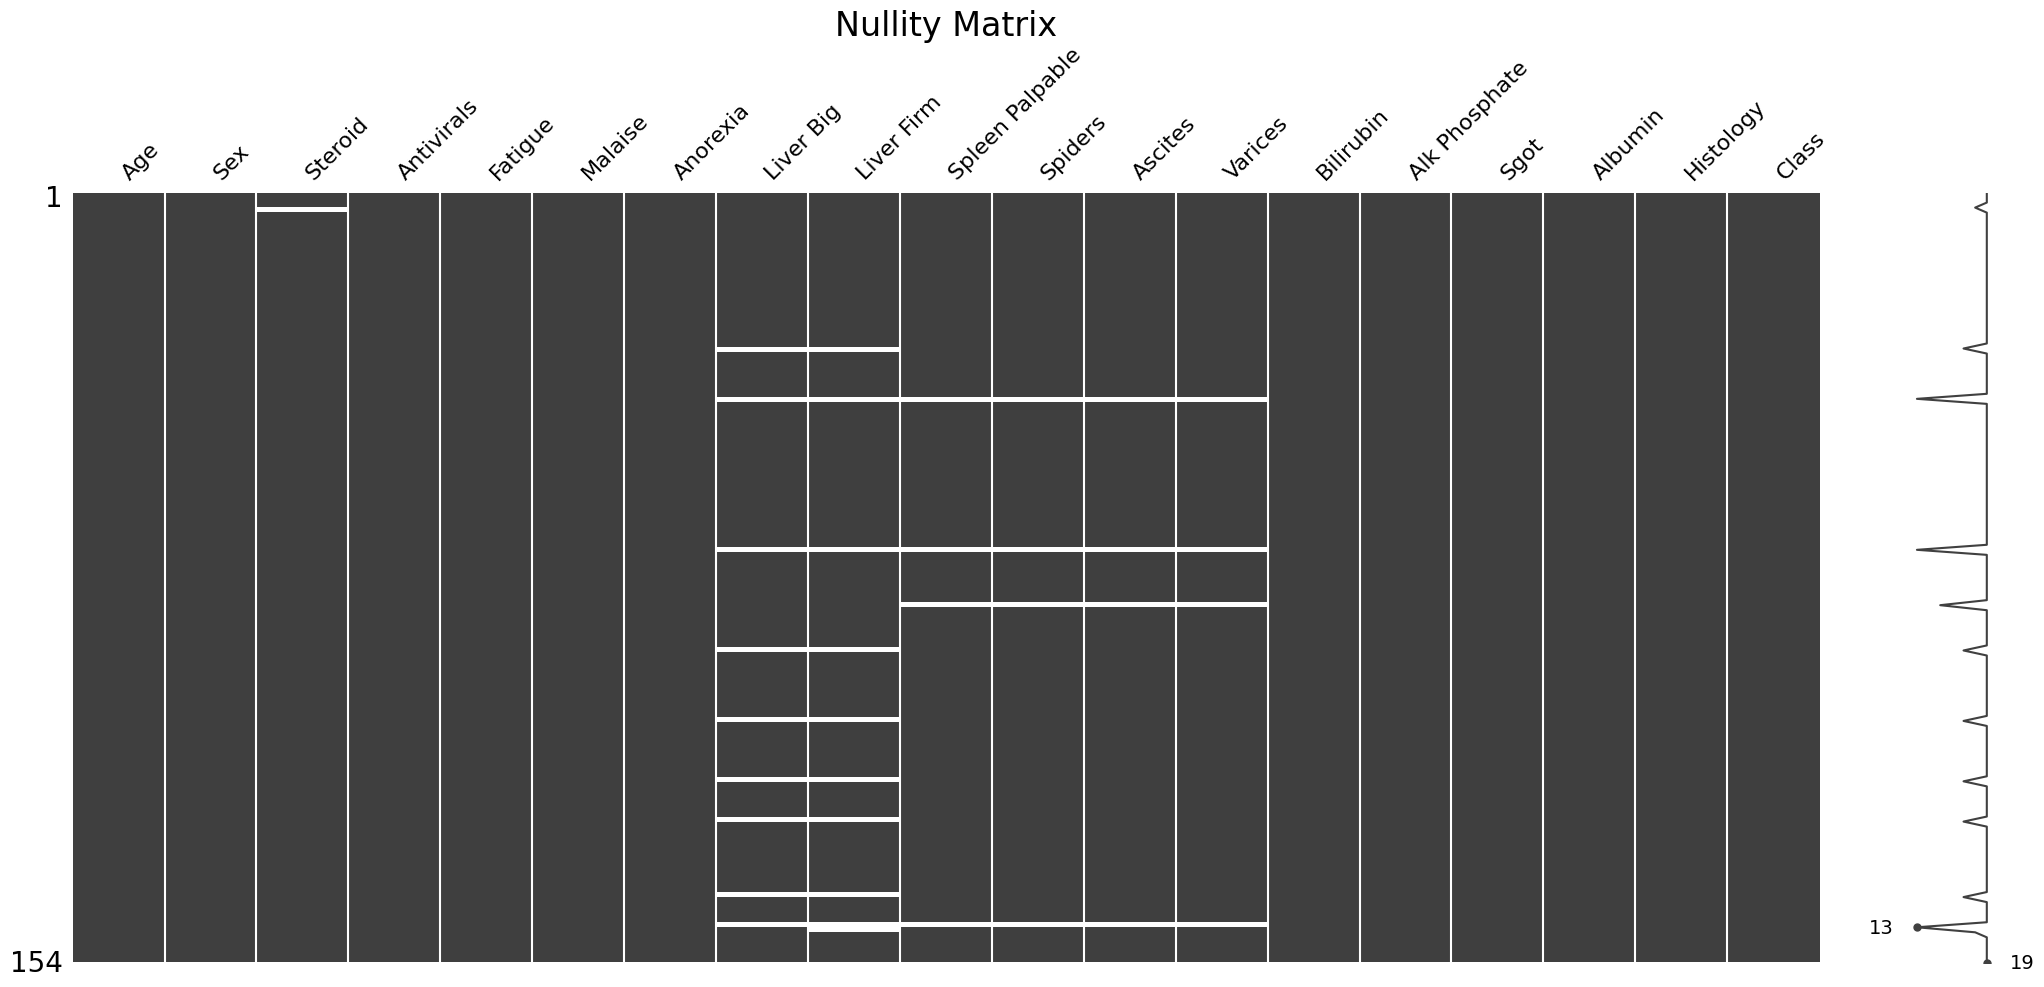

In [59]:
# Plotting Nullity Matrix
ax = ms.matrix(df_hepatitis)
ax.set_title('Nullity Matrix', fontsize=24)

We still have some missing values, but all of them are binary categorical features. For simplicity, we will remove them from our dataset.

Text(0.5, 1.0, 'Nullity Matrix')

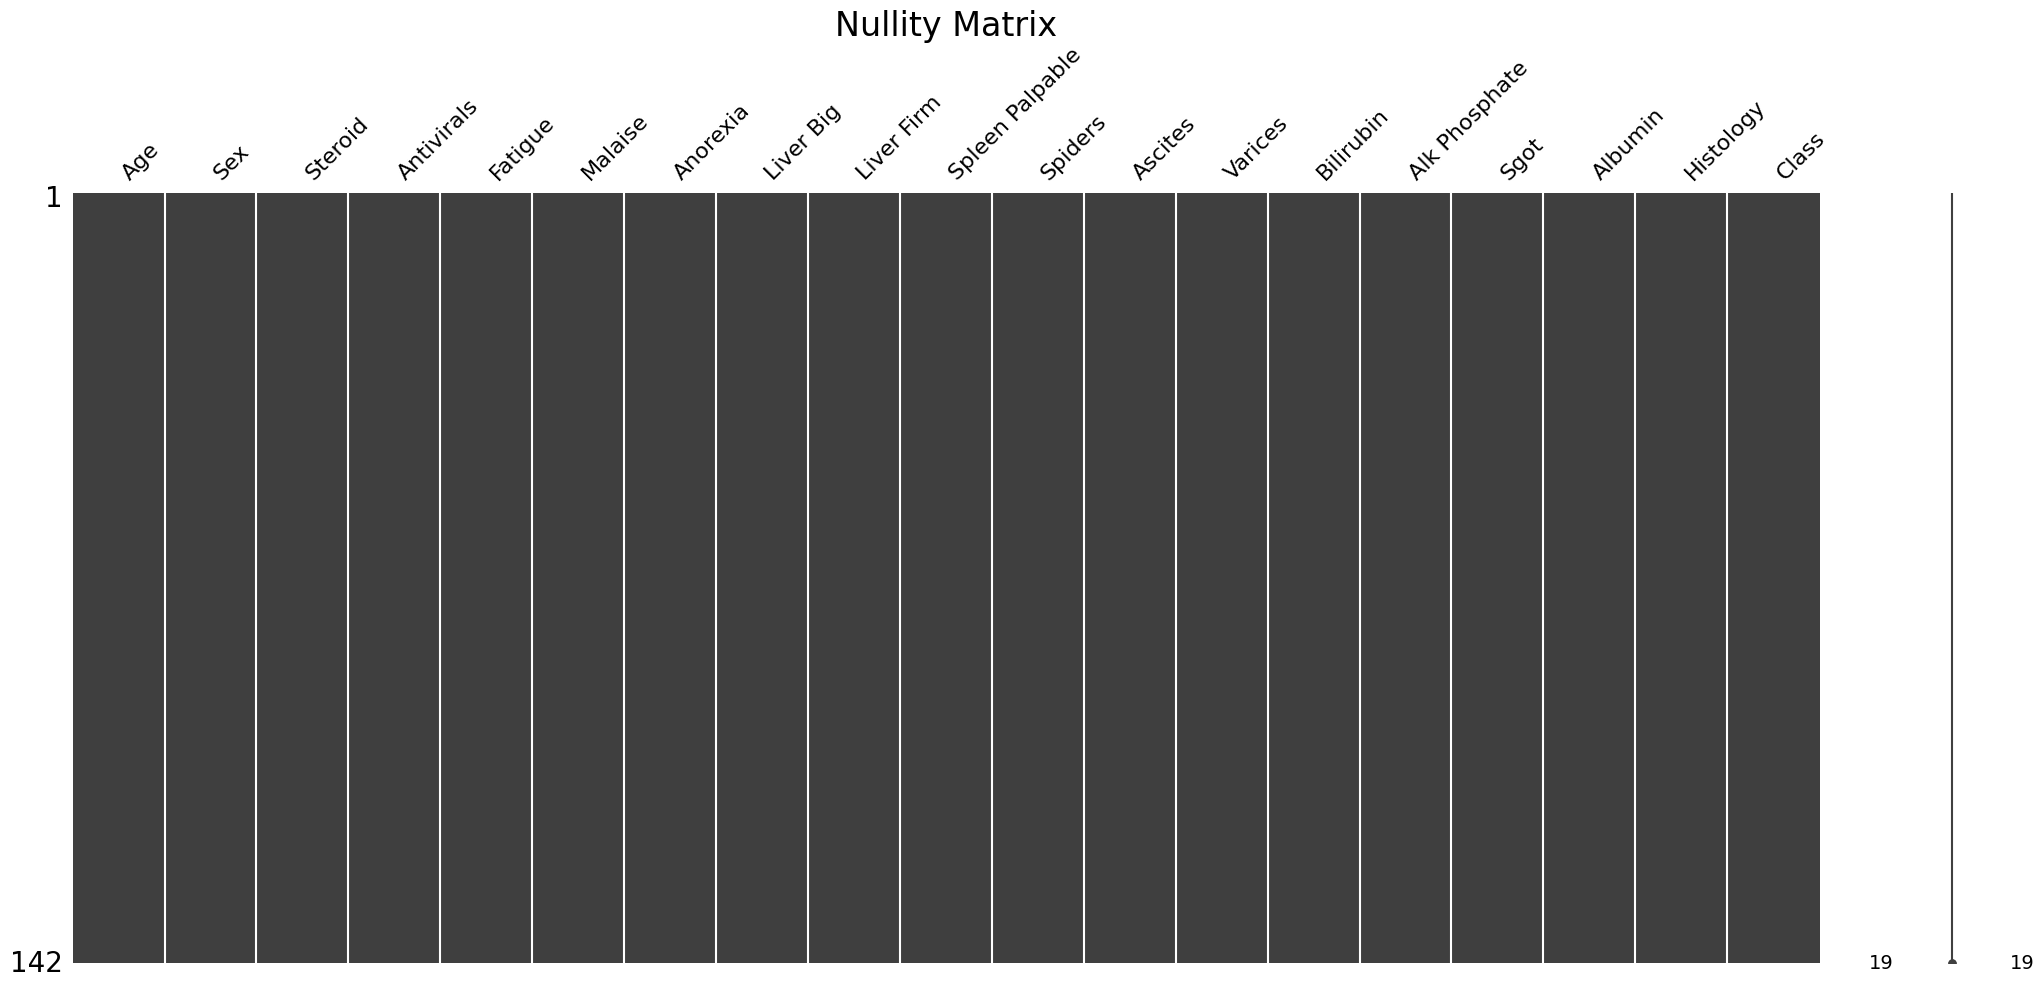

In [60]:
df_hepatitis.dropna(inplace=True)

# Plotting Nullity Matrix
ax = ms.matrix(df_hepatitis)
ax.set_title('Nullity Matrix', fontsize=24)

Now our dataset has no missing values, we can go further on our analysis.

## 4.5 Balance analysis after missing values handling

Since we removed some instances form our dataset, let's analyze the impact on the target class balance in our dataset. The figure bellow show the current absolute frequency of each class as a result of our pre-processing stage.

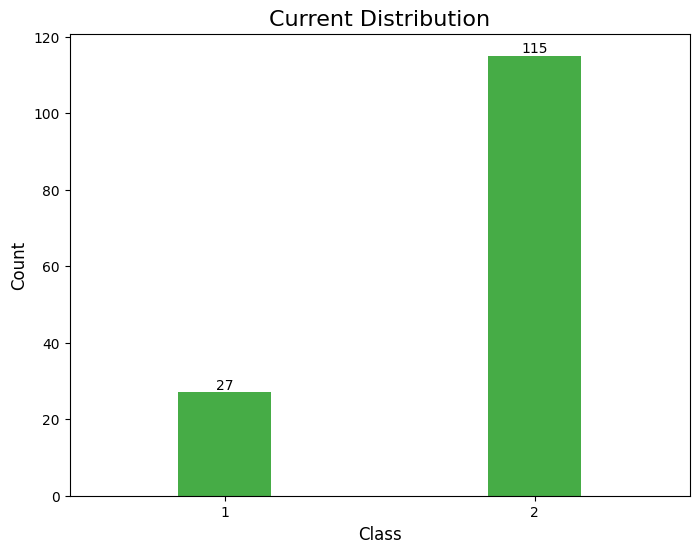

In [61]:
# Defining figure size
plt.figure(figsize=(8, 6))

# Configuring countplot
ax = sns.countplot(x='Class', data=df_hepatitis, width=0.3, color='#35BD35')

# Adding numbers to the top of the bars
ax.bar_label(ax.containers[0])

# Title and lable configuration
ax.set_title('Current Distribution', fontsize=16)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

The image bellow compare the current absolute frequency of each target class with the absolute frequency we had before handling the missing values.

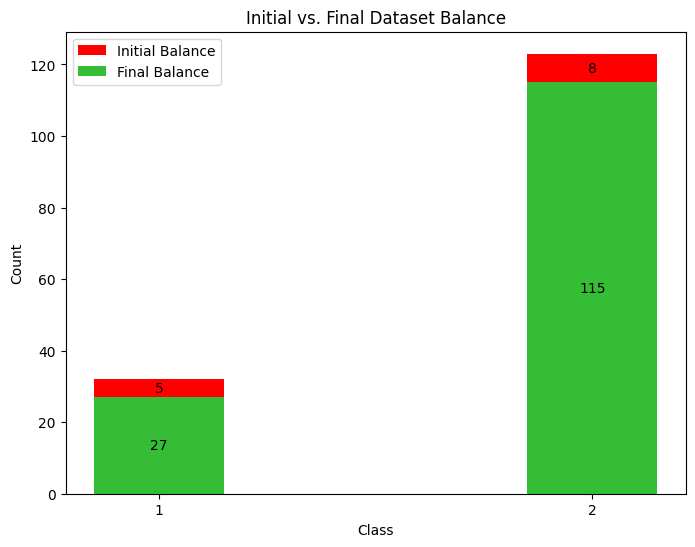

In [62]:
final_dataset_balance = df_hepatitis['Class'].value_counts()

# Calculate the difference
difference = np.subtract(initial_dataset_balance, final_dataset_balance)

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
p1 = ax.bar(difference.index, difference, bottom=final_dataset_balance, color='red', label='Initial Balance', width=0.3)
p2 = ax.bar(final_dataset_balance.index, final_dataset_balance, color='#35BD35', label='Final Balance', width=0.3)

# Add labels to each bar
for bar in p1 + p2:
    height = bar.get_height()
    if height > 0:  # Only label bars with non-zero height
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                 int(height), ha='center', va='center', color='black')



# Add labels, title, legend and configure xticks
plt.xticks(final_dataset_balance.index)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Initial vs. Final Dataset Balance')
plt.legend()

# Display the chart
plt.show()

By analyzing the bar chart above we can see that class 1 (die) was reduced by 5 instances while the class 2 (live) was reduced by 12 instances. So from 32 "die" instances we had before, now we have 27; and from 127 "live" instances we had before now we have 115.

The image bellow present the relative impact that these losses in both classes.

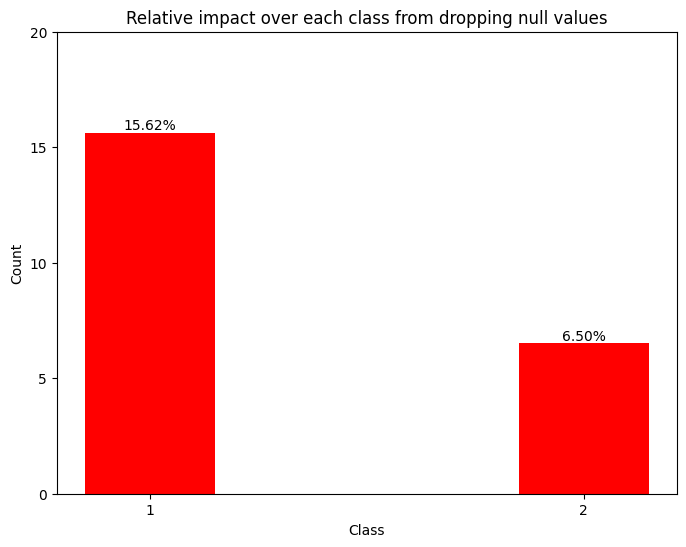

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(difference.index, difference / initial_dataset_balance * 100, color='red', width=0.3)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.xticks(difference.index)
plt.yticks(np.arange(0, 25, 5))

# Add labels, title, and legend
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Relative impact over each class from dropping null values')

# Display the chart
plt.show()

So we noticed that even class 1 (die) had a lower absolute impact than class 2 (live), proportionally class 1 (die) was way more penalyzed than class 2 (live).

# 5 Data visualization

In this section we will analyze our dataset through differents perspectives, exploring data visualization techniques to get some insights from it. Since there is differences when analyzing continuous features and categorical features, we will do it separately.

## 5.1 Continuous features

We will start with some data visualization for our continuous features. The techniques applied for these features are:


*   Histograms
*   Density graphs
*   Boxplot analysis
*   Correlation Matrix
*   Scatter plots



### 5.1.1 Histograms

In the 4.4.1 Missing values handling section, we already analyzes the histograms for continuous features, in order to identify patters that helped us to decide to apply the median imputation technique. This allowed us to minimize the target class balance impact due to data removal applied in categorical features. But now we can analyze the histograms as a result from our median imputation tachnique that was apllied, the figure bellow presents these results.

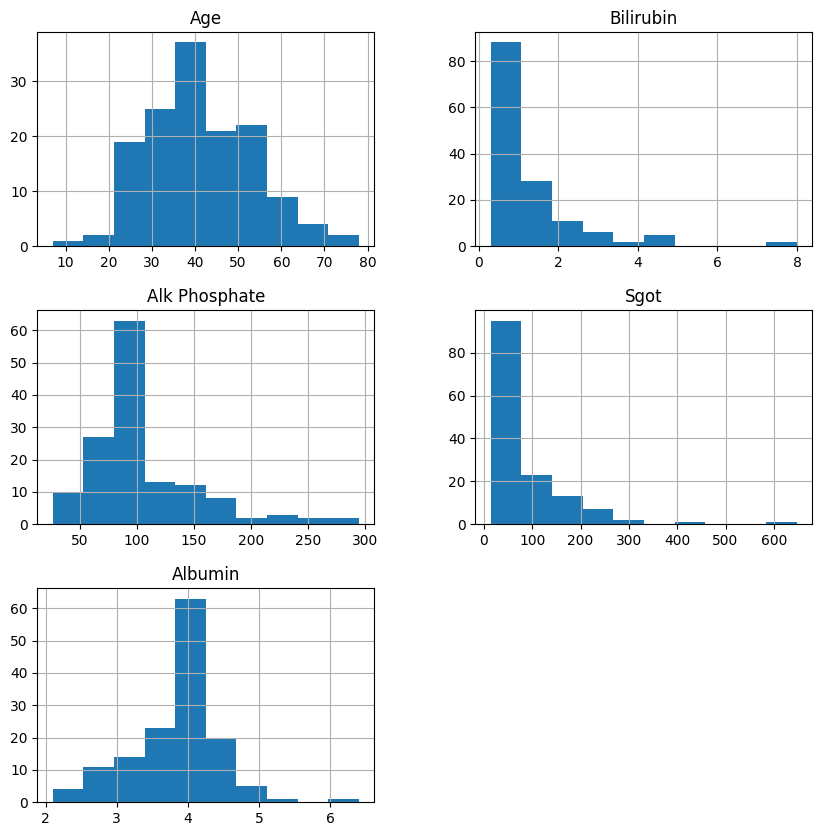

In [64]:
df_hepatitis.hist(column=continuous_columns, figsize=(10,10))
plt.show()

By analyzing the histograms, we noticed that only "Alk Phosphate" had an easy visible impact between 100 and 200 values.

### 5.1.2 Density graphs

The density graphs follow the same analytical approach as histograms. The figure below presents the density graphs resulting from our pre-processing procedure.

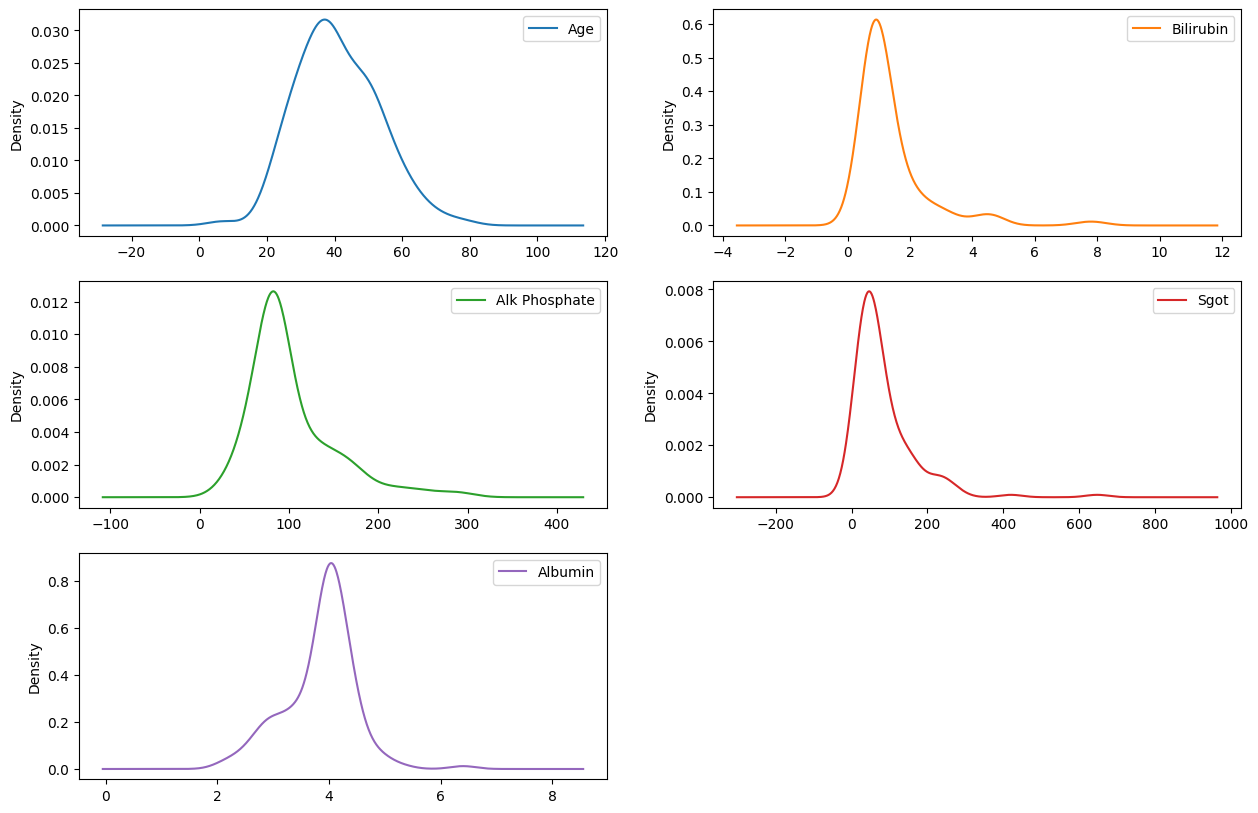

In [65]:
df_hepatitis[continuous_columns].plot(kind='density', layout=(3,2), subplots=True, sharex=False, figsize=(15,10))
plt.show()

Here we also noticed that the "Alk Phosphate" curve became thinner, while the remaining features were not impacted as much.

### 5.1.3 Boxplot analysis

The boxplot analysis is useful for analyzing data distribution and identifying outliers in our dataset. The figure below presents the boxplot for the continuous features of our dataset.

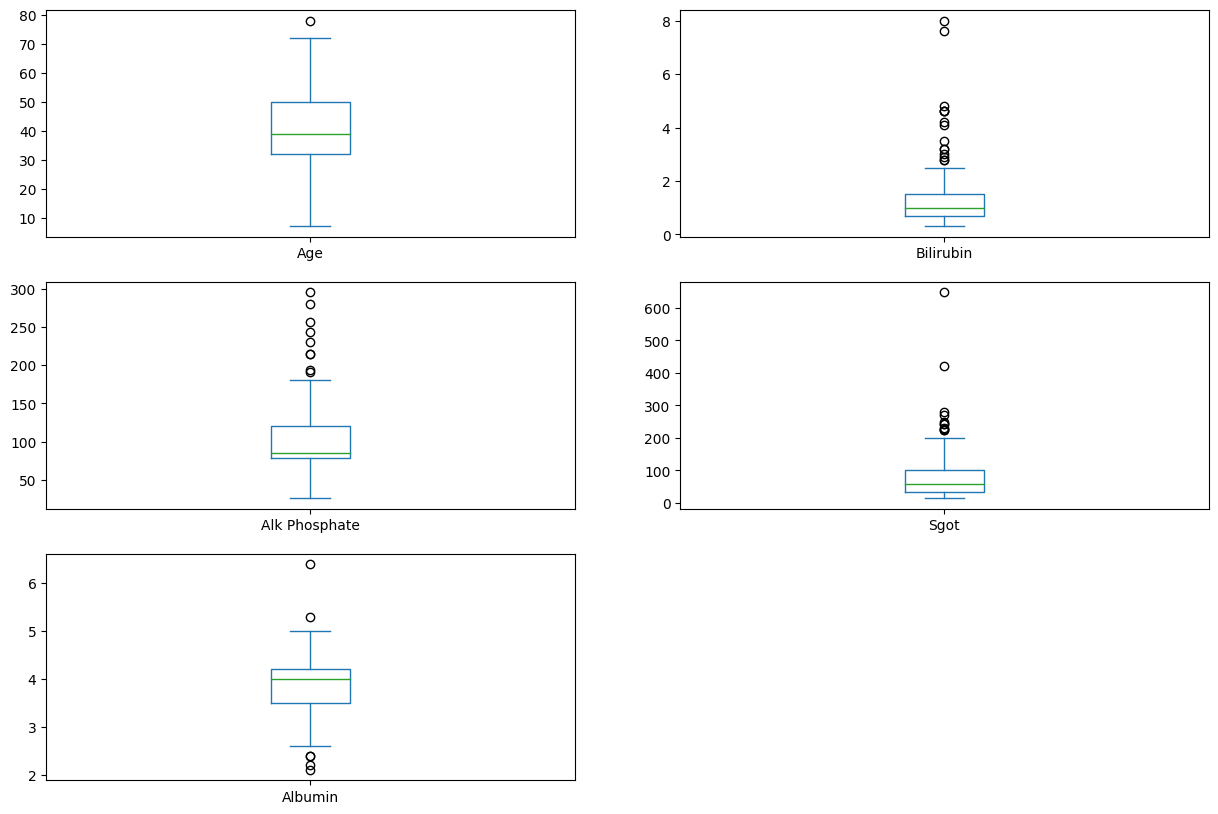

In [66]:
df_hepatitis[continuous_columns].plot(kind='box', layout=(3,2), subplots=True, sharex=False, figsize=(15,10))
plt.show()

First of all, we can notice that "Age" doesn't have many outliers, which makes sense since human life expectancy has a natural limit, and the single outlier present is entirely possible. This leads us to assume that our dataset is concise. The remaining features have many outliers, which could severely impact the performance of the machine learning model. We must keep this in mind during model evaluation.

### 5.1.4 Correlation Matrix

Now we will present the correlation matrix between the continuous features and between the target class and the continuous features.

#### 5.1.4.1 Between continual features

In the heatmap presented bellow, keep in mind that:


*   1 indicates a perfect positive correlation, where the associated features either grow or regress linearly
*   -1 indicates a perfect nogative correlation, where the associated features have opposite behavior, while one of them grow the other one regress linearly
*   0 indicates no correlation

The thresholds for correlation strength is as follows:


*   Weak correlation: -0.1 to 0.1
*   Moderate correlation: -0.3 to -0.1 or 0.1 to 0.3
*   Strong correlation: -0.5 to -0.3 or 0.3 to 0.5
*   Very strong correlation: below -0.5 or above 0.5





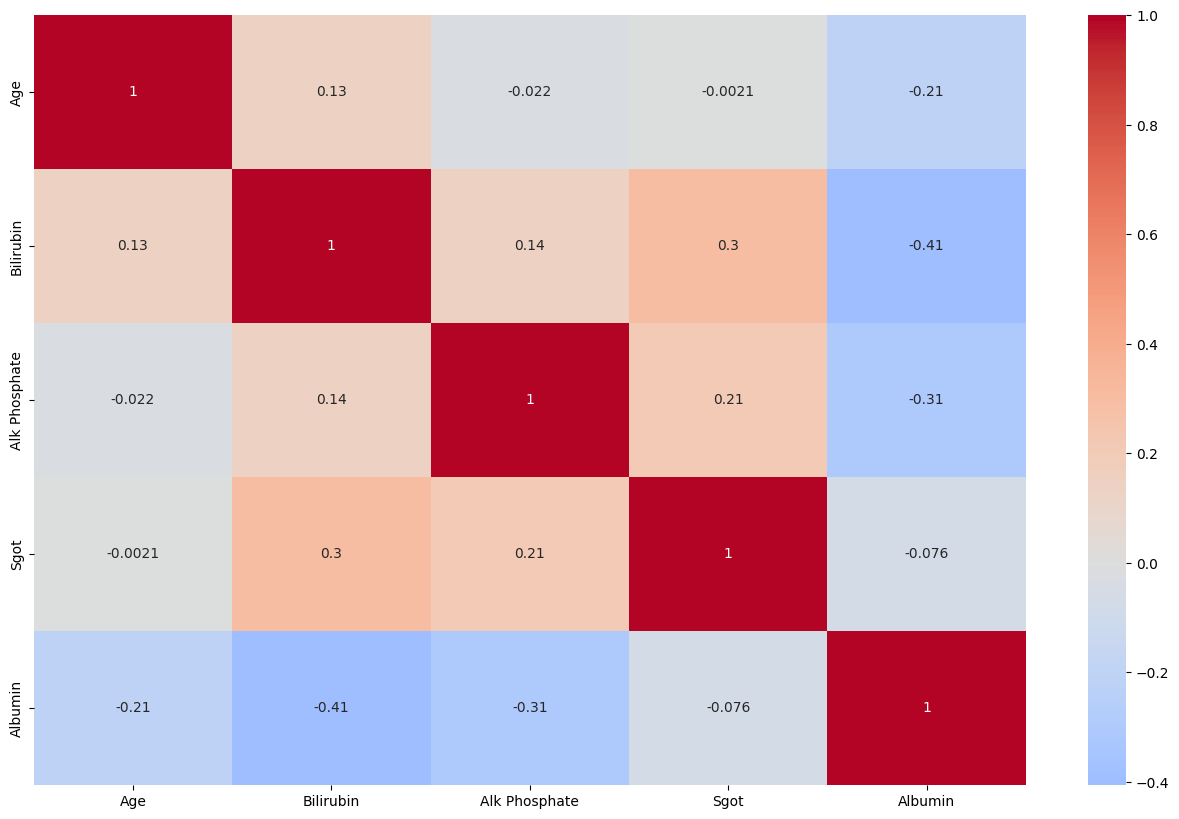

In [67]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(16,10))
sns.heatmap(df_hepatitis[continuous_columns].corr(), annot=True, cmap='coolwarm', center=0);
plt.show()

By analyzing the heatmap above we can notice some weak correlations as well as some strong correlations:


*   Weak correlations: "Age" have 2 weak correlations, which lead us to consider these features if a dimension reduction approach would be necessary. "Sgot" also have 2 weak correlations, but it has 1 strong correlation so we would keep it as long as we can.
*   Strong correlations: "Billurubin" and "Albumin" have 2 strong correlations, what may indicate that these features are important for determining the target class.



#### 5.1.4.2 Between target class and each continual feature

The Point-Biserial Correlation is used when one variable is binary and the other is continuous. This technique allowed us to analyze the correlation between each continuous feature and the target categorical class.

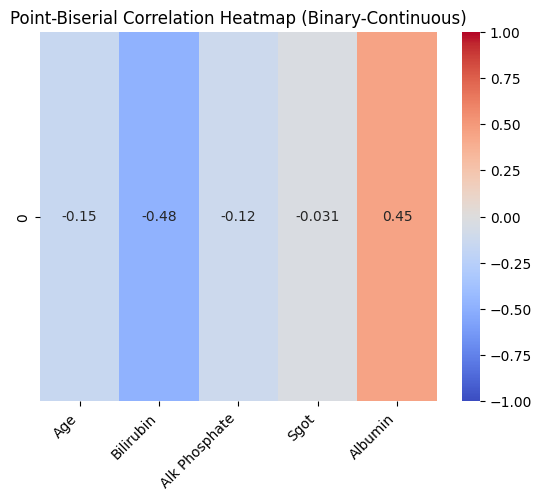

In [68]:
# Dictionary to store correlations for each continuous column
correlations = {}

# Dictionary to store p-values for each continuous column
p_values = {}

# Iterate through continuous columns and compute Point-Biserial correlation
for column in continuous_columns:
    correlation, p_value = pointbiserialr(df_hepatitis['Class'], df_hepatitis[column])
    correlations[column] = correlation
    p_values[column] = p_value

# Plot config
sns.heatmap([list(correlations.values())], annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=continuous_columns)
plt.title('Point-Biserial Correlation Heatmap (Binary-Continuous)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

As we assumed before, the point-biserial showed us that "Bilirubin" and "Albumin" indeed are important when defining the target class. They have a strong correlation with the target class.

### 5.1.5 Scatter Plots

The scatter plots are very useful to identify some patterns on data. Here we user a color legend to indicate class 1 (die) and class 2 (live), their colors are black and skyblue respectively.

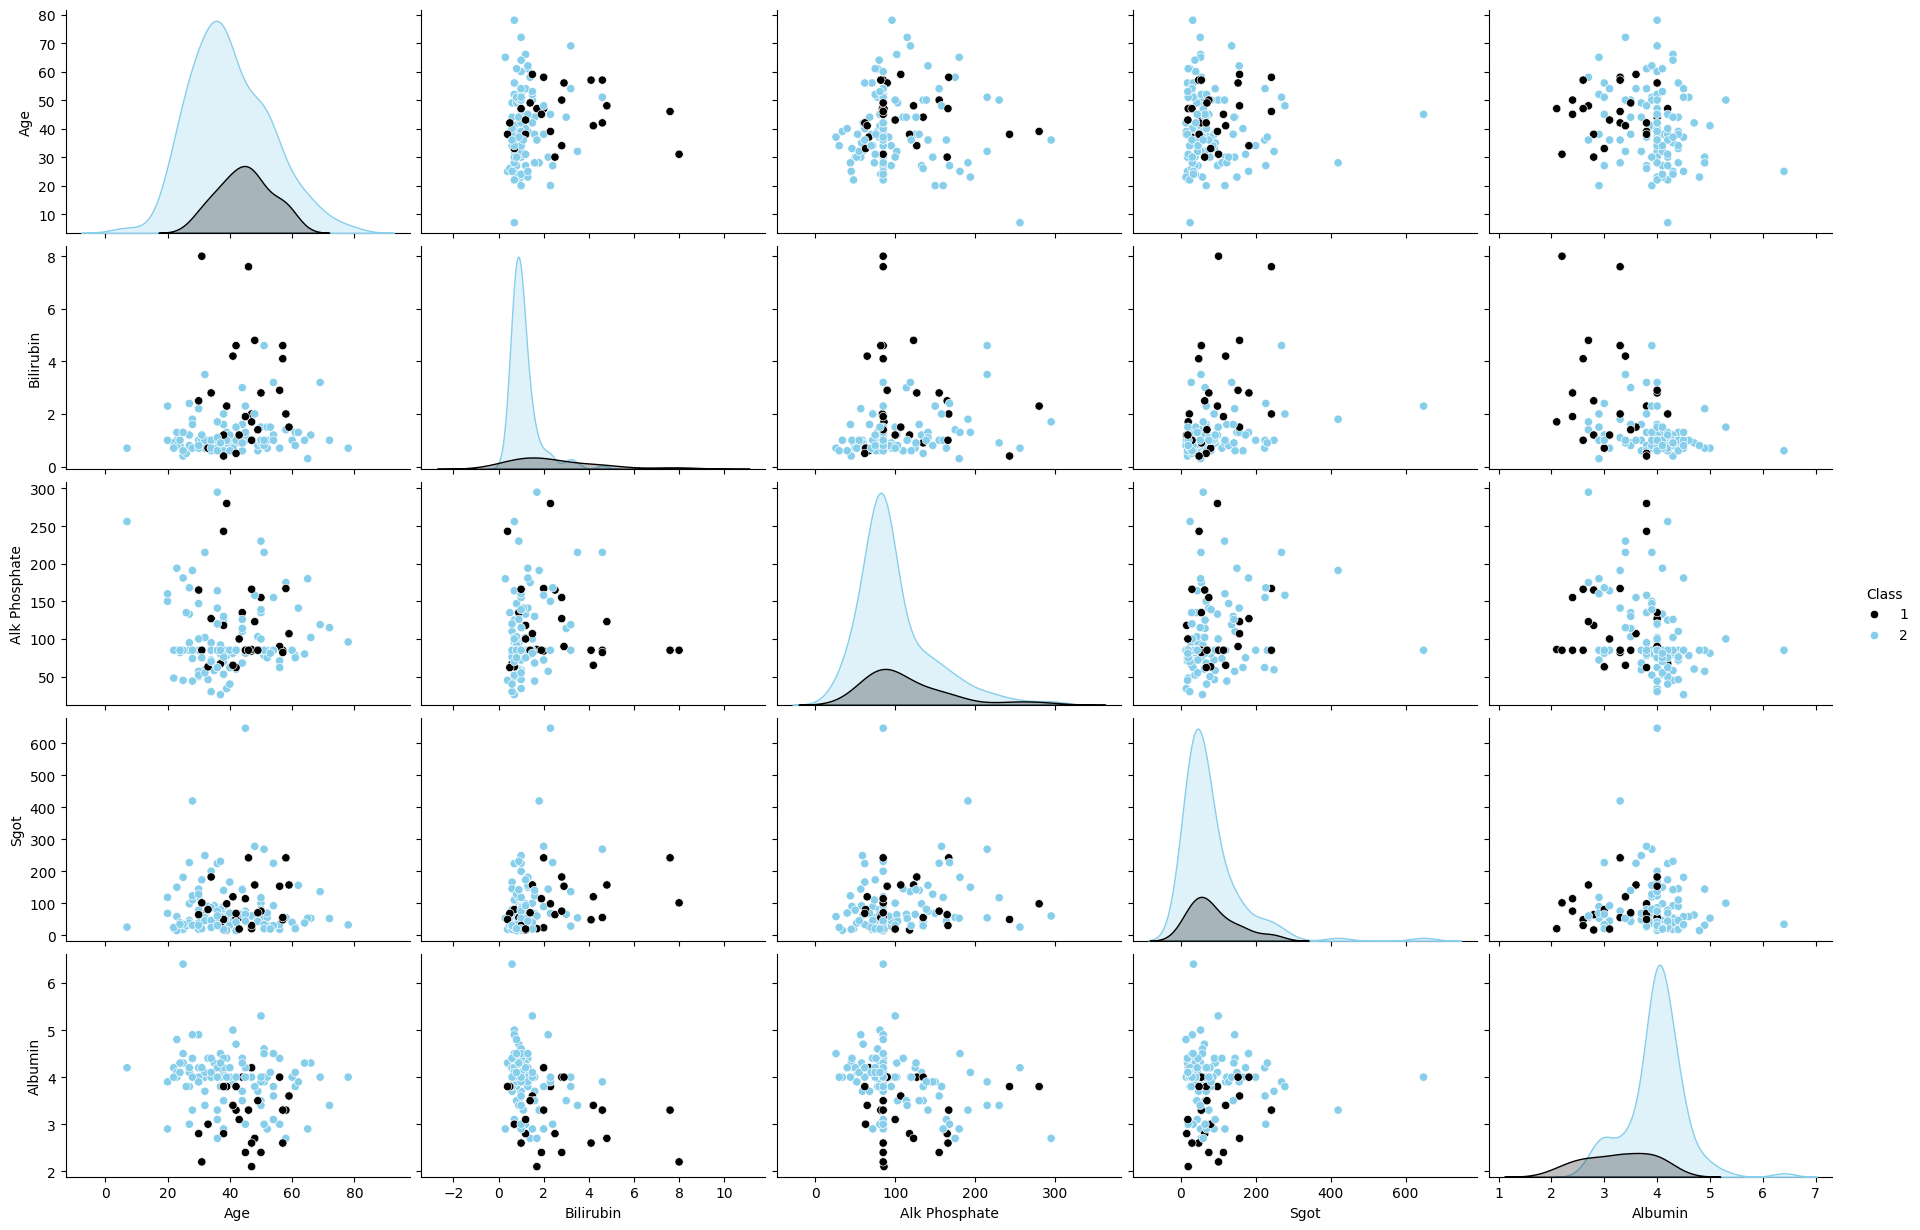

In [69]:
continuous_columns_class = continuous_columns + ['Class']

sns.pairplot(df_hepatitis[continuous_columns_class], hue="Class", height=2.5, aspect=1.5, palette=['black', 'skyblue']);

Unfortunately, the first thing we notice when analyzing the scatter plots is that our dataset imbalance is even more explicit. This makes the analysis of this type of data visualization harder than the previous one. However, we can still find some meaningful patterns, such as 'Albumin vs. Sgot,' where the majority of Class 1 (die) have low levels of both 'Albumin' and 'Sgot.'

## 5.2 Binary features

Now we will take a look on the binary features. For these features we used the following techniques:


*   Histograms
*   Correlation matrix



### 5.2.1 Histograms

The figure bellow presents the histograms for the bonary features.

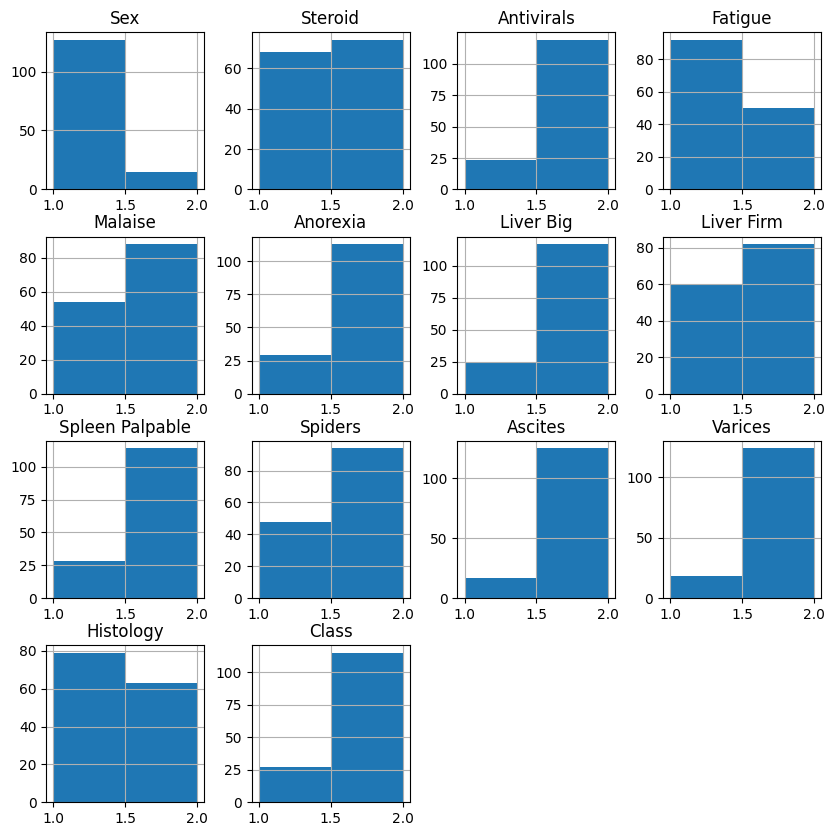

In [70]:
categorical_columns_class = categorical_columns + ['Class']
df_hepatitis.hist(column=categorical_columns_class, figsize=(10,10), bins=2)
plt.show()

When analyzing the histogram for a binary value, we some severe imbalance issues. We already knew that the target "Class" is imbalanced, but the histograms above showed us that "Sex" also is very imbalanced. There are others features that seems to be imbalanced, like "Antivirals", "Ascites", "Varices", etc, but to conclude that these imbalance represent some issue in our dataset, we would required a domain knowledge.

### 5.2.2 Association Matrix

In order to analyze the association between the categorical features, we used the Cramér's V method. The heatmap generated by Cramer's V method is slightly different from the linear correlation. Here the values represents the following:


*   0 indicates no association between the variables
*   1 indicates a perfect association (the variables are completely dependent).

The thresholds for association strength is as follows:


*   Weak association: 0.00 to 0.10
*   Moderate association: 0.10 to 0.30
*   Strong association: 0.30 to 0.50
*   Very strong association: Above 0.50



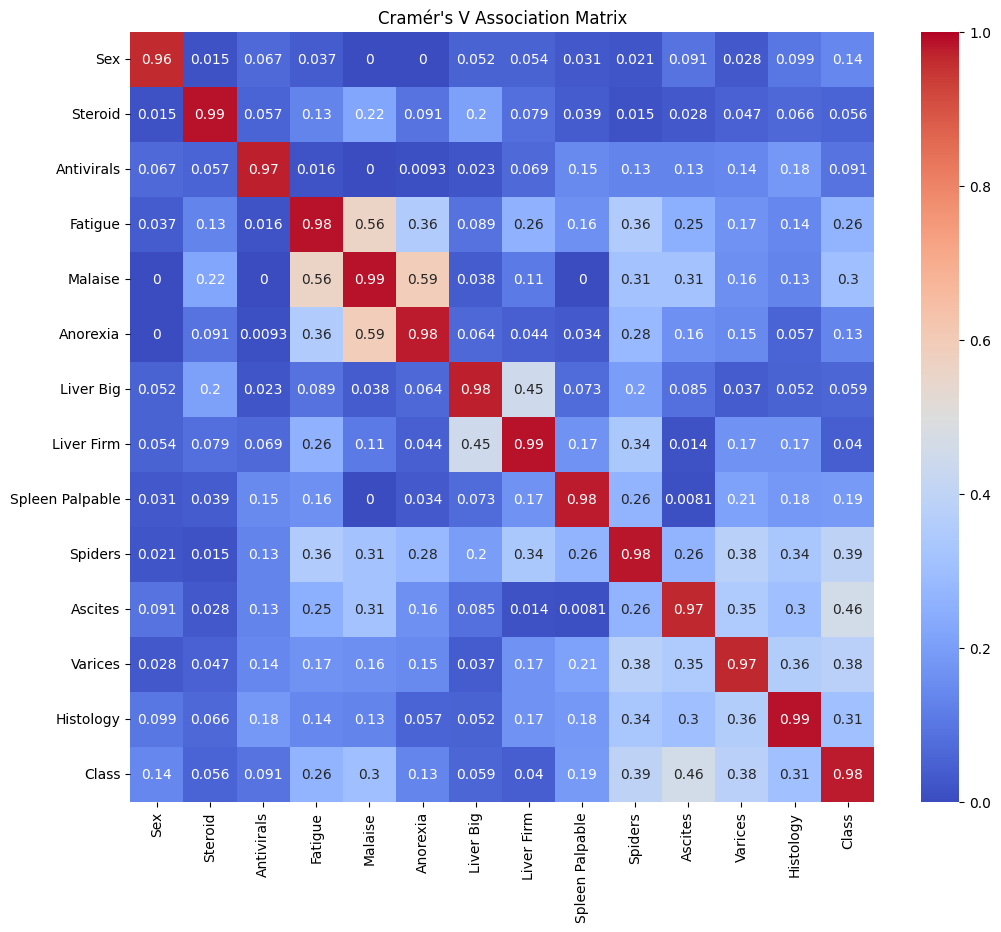

In [71]:
# Adding class to list of columns
categorical_columns_class = categorical_columns + ['Class']

# Creating the association matrix
corr_matrix = pd.DataFrame(index=categorical_columns_class, columns=categorical_columns_class)

# Calculating the Cramer's V for each combination of two categorical features
for col1 in categorical_columns_class:
    for col2 in categorical_columns_class:
        corr_matrix.loc[col1, col2] = cramers_v(df_hepatitis[col1], df_hepatitis[col2])

# Convert the matrix to numeric values
corr_matrix = corr_matrix.astype(float)

# Plot configuration
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Association Matrix")
plt.show()

By analyzing the association heatmap we notice that "Melaise", "Fatigue" and "Anorexia" have very strong association between them. Since this indicates that these features are likely carrying similar information, this can be useful if a dimension reduction is required or not. This association matrix also show us the greatest feature association with our target class.

# 6 Test and training split

Now that we did all the exploratory data analysis and pre-processing stage, lets split our dataset into test and training subsets in order to use them to create a machine learning model. Since we already have an imbalance dataset, we will use a stratified approach to split our dataset but keep the proportionality of our target class in each subset.

In [72]:
# Getting dataframe values as numpy.ndarray
arr_hepatitis = df_hepatitis.to_numpy()

# Getting just the features values
X = arr_hepatitis[:, :-1]

# Getting just the target values
y = arr_hepatitis[:, -1]

# Splitting our dataset in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# 7 Conclusion

After perform the exploratory data analysis and pre-processing stages, our dataset is ready to be used by a machine learning model. Even though there are several issues in this dataset, we apllied all the necessary techniques to let the dataset in a minimal state to be used in a machine learning model training.

## 7.1 Future works

### 7.1.1 Outliers handling and domain knowledge

The boxplot view showed us that several continuous features have outliers, we need to understand if these outliers can impact the model performance and if do, we need to handle them to minimize their impact.

### 7.1.2 Categorial missing values handling

During the pre-processing stage, we dropped the categorical missing values. However, we could explore better approaches to retain the instances we had and mitigate the impact of imbalance caused by dropping them.

### 7.1.3 Imbalance handling

There are some imbalance handling approaches that uses machine learning and other tools that are beyond the scope of this work. These techniques could be implemented here in order to improve the balance of our dataset.